In [1]:
from google.colab import drive
drive.mount('gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at gdrive


In [0]:
import os
os.chdir('gdrive/My Drive/project')

In [0]:
pwd

'/content'

In [8]:
import os
os.listdir()

['train_unet.py',
 'My_Project (1).py',
 'My_Project.py',
 '__pycache__',
 'model.png',
 'Training_Data.h5',
 'test.png',
 'test1.png',
 'unet_inception.py',
 'Train_data.h5',
 'data_OT.h5',
 'train_unet.py.gdoc',
 'data_OT_new.h5',
 '.ipynb_checkpoints',
 'unet_inception_1.py',
 'unet_inception.h5',
 'group_norm.py',
 'filter1.py',
 'unet_inception_4.py',
 'unet_inception_bn.py',
 'unet_inception_tr.py',
 'unet_inception_tr.h5',
 '3C_Train_data.h5',
 '3C_Norm_Train_data.h5',
 'unet_inception_tr.png',
 'unet_inception_bn_weights.h5',
 'sample images',
 'pca_train_data.h5',
 'train_model.ipynb',
 'project.ipynb',
 'train_500_T1.png',
 'train_500_T2_FLAIR.png',
 'train_500_morph.png',
 'train_500_3C.png',
 'train_200_T1.png',
 'train_200_T2_FLAIR.png',
 'train_200_morph.png',
 'train_200_3C.png']

In [3]:
import numpy as np
import h5py
from keras.callbacks import ModelCheckpoint 
from keras import backend as kb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.engine import Model
from keras.callbacks import TensorBoard
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA as RandomizedPCA
#import tensorlayer as tl
#from my_model import *
#from unet_inception import *
from keras.utils import plot_model,to_categorical
from keras.models import load_model
import cv2

Using TensorFlow backend.


In [0]:
hf=h5py.File('pca_train_data.h5','r')
print(list(hf.keys()))
pca_train_data=hf['pca_train_data'][:]
hf.close()
print(np.shape(pca_train_data))

['pca_train_data']
(4560, 240, 240, 3)


In [4]:
hf=h5py.File('3C_Norm_Train_data.h5','r')
print(list(hf.keys()))
train_data=hf['train_data'][:]
hf.close()
print(np.shape(train_data))

['train_data']
(4560, 240, 240, 3)


In [0]:
del train_data

W0718 08:19:59.831110 140673388652416 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


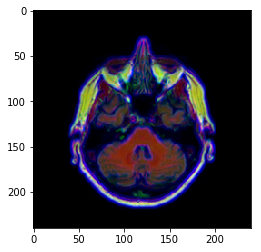

In [5]:
plt.imshow(train_data[200,:,:,:])

In [7]:
import matplotlib
matplotlib.image.imsave('train_500_T1.png', train_data[500,:,:,0])
matplotlib.image.imsave('train_500_T2_FLAIR.png', train_data[500,:,:,1])
matplotlib.image.imsave('train_500_morph.png', train_data[500,:,:,2])
matplotlib.image.imsave('train_500_3C.png', train_data[500,:,:,:])
matplotlib.image.imsave('train_200_T1.png', train_data[200,:,:,0])
matplotlib.image.imsave('train_200_T2_FLAIR.png', train_data[200,:,:,1])
matplotlib.image.imsave('train_200_morph.png', train_data[200,:,:,2])
matplotlib.image.imsave('train_200_3C.png', train_data[200,:,:,:])

W0718 08:20:19.486383 140673388652416 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0718 08:20:19.601754 140673388652416 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


W0629 06:15:46.279262 139827672930176 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


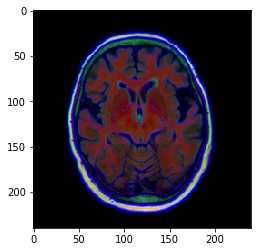

In [0]:
plt.imshow(train_data[500])

In [0]:
new_train_data = []

for i in range(train_data.shape[0]):
  edge_img = edge_sharp(train_data[i,:,:,0])
  temp = np.dstack((train_data[i,:,:,0],train_data[i,:,:,2],edge_img)) 
  new_train_data.append(temp)

np.asarray(new_train_data)
new_training_data.shape

In [0]:
hf=h5py.File("new_train_data"+'.h5','w')
hf.create_dataset('new_train_data', data=new_train_data)
hf.close()

In [0]:
new_train_data = np.asarray(new_train_data).shape

In [0]:
plt.imshow(train_data[500,:,:,:])

In [0]:
train_T1 = np.dstack(train_data[i,:,:,0] for i in range(train_data.shape[0]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """Entry point for launching an IPython kernel.


In [0]:
train_morph = np.dstack(train_data[i,:,:,2] for i in range(train_data.shape[0]))

In [0]:
train_morph = np.reshape(train_morph,(4560,240,240,1))

In [0]:
train_T1 = np.reshape(train_T1,(4560,240,240,1))

In [0]:

train_T1.shape

(4560, 240, 240, 1)

In [0]:
hf=h5py.File("data_OT_new"+'.h5','w')
hf.create_dataset('data_OT_new', data=data_OT_new)
hf.close()

In [5]:
hf=h5py.File('data_OT_new.h5','r')
print(list(hf.keys()))
data_OT_new=hf['data_OT_new'][:]
hf.close()
print(np.shape(data_OT_new))

['data_OT_new']
(4560, 240, 240, 4)


In [0]:
new_train_data = []
pca = RandomizedPCA(150)
for img in train_data:
  pca.fit(img[:,:,0])
  component_1 = pca.transform(img[:,:,0])
  projected_1 = pca.inverse_transform(component_1)
  projected_1 = projected_1.flatten().reshape(240,240)
  pca.fit(img[:,:,1])
  component_2 = pca.transform(img[:,:,1])
  projected_2 = pca.inverse_transform(component_2)
  projected_2 = projected_2.flatten().reshape(240,240)
  pca.fit(img[:,:,2])
  component_3 = pca.transform(img[:,:,2])
  projected_3 = pca.inverse_transform(component_3)
  projected_3 = projected_3.flatten().reshape(240,240)
  pca_img = np.dstack((projected_1,projected_2,projected_3))
  new_train_data.append(pca_img)
pca_train_data = np.asarray(new_train_data)

In [0]:
del data_OT_new

In [0]:
hf=h5py.File("pca_train_data"+'.h5','w')
hf.create_dataset('pca_train_data', data=pca_train_data)
hf.close()
print(np.shape(pca_train_data))

(4560, 240, 240, 3)


In [0]:
model.fit(train_data,data_OT_new,batch_size = 8 , epochs = 20,validation_split = 0.2, verbose = 1)

#model.evaluate(data_T2_FLAIR,data_OT,batch_size=4)

plt.imshow(train_data[500,:,:,:])

In [6]:
from unet_inception_tr import *
model = unet_inception_tr()
model.summary()

W0718 12:24:58.135378 140258053412736 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0718 12:24:58.194381 140258053412736 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0718 12:24:58.220186 140258053412736 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0718 12:24:58.269459 140258053412736 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0718 12:24:58.270539

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 240, 240, 3)  0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 240, 240, 8)  32          input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 240, 240, 8)  32          input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 240, 240, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (

In [0]:
from keras.utils import plot_model
plot_model(model1, to_file='unet_inception_tr.png')

In [19]:
model.fit(train_data,data_OT_new,batch_size = 8 , epochs = 20,validation_split = 0.2, verbose = 1)

W0718 12:29:17.432497 140258053412736 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 3648 samples, validate on 912 samples
Epoch 1/20
 592/3648 [===>..........................] - ETA: 6:15 - loss: 0.0721 - acc: 0.9697 - dice_coef: 0.9785

KeyboardInterrupt: ignored

In [0]:
model.load_weights('unet_inception_tr.h5')

In [0]:
p=model.predict(train_data[500,:,:,:].reshape(1,240,240,3))

In [0]:
p_new = np.round_(p,0)

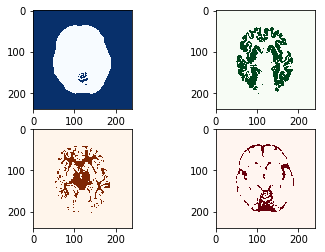

In [28]:

for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(p_new[0,:,:,i], cmap = cmaps[i])

In [0]:
cmaps = ['Blues', 'Greens', 'Oranges', 'Reds']
import matplotlib
matplotlib.image.imsave('op_1(500).png', p[0,:,:,0], cmap = 'Blues')
matplotlib.image.imsave('op_2(500).png', p[0,:,:,1], cmap = 'Greens')
matplotlib.image.imsave('op_3(500).png', p[0,:,:,2], cmap = 'Oranges')
matplotlib.image.imsave('op_4(500).png', p[0,:,:,3], cmap = 'Reds')

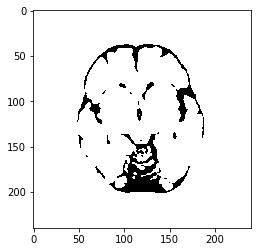

In [50]:
plt.imshow(p_new[0])

In [30]:
o_1 = plt.imread('op_1(500).png')
o_2 = plt.imread('op_2(500).png')
o_3 = plt.imread('op_3(500).png')
o_4 = plt.imread('op_4(500).png')
o = np.dstack((o_1,o_2,o_3,o_4))
o.shape

(240, 240, 16)

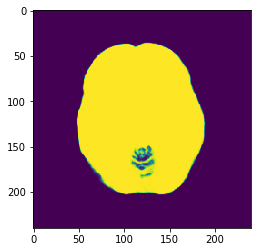

In [46]:
plt.imshow(o[:,:,1])

In [0]:
history = model.fit(pca_train_data,data_OT_new,batch_size = 12 , epochs = 20,validation_split = 0.2, verbose = 1)

W0717 10:35:32.353766 140291381294976 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 3648 samples, validate on 912 samples
Epoch 1/20
3648/3648 [==============================] - 756s 207ms/step - loss: 0.6777 - acc: 0.8411 - dice_coef: 0.7654 - val_loss: 0.4119 - val_acc: 0.9217 - val_dice_coef: 0.8863
Epoch 2/20
3648/3648 [==============================] - 719s 197ms/step - loss: 0.4215 - acc: 0.9329 - dice_coef: 0.8845 - val_loss: 0.3988 - val_acc: 0.9145 - val_dice_coef: 0.8956
Epoch 3/20
3648/3648 [==============================] - 719s 197ms/step - loss: 0.3205 - acc: 0.9448 - dice_coef: 0.9234 - val_loss: 0.2882 - val_acc: 0.9396 - val_dice_coef: 0.9322
Epoch 4/20
3648/3648 [==============================] - 720s 197ms/step - loss: 0.2522 - acc: 0.9511 - dice_coef: 0.9447 - val_loss: 0.2353 - val_acc: 0.9464 - val_dice_coef: 0.9475
Epoch 5/20
3648/3648 [==============================] - 720s 197ms/step - loss: 0.2069 - acc: 0.9547 - dice_coef: 0.9560 - val_loss: 0.2195 - val_acc: 0.9416 - val_dice_coef: 0.9492
Epoch 6/20
3648/3648 [=====================

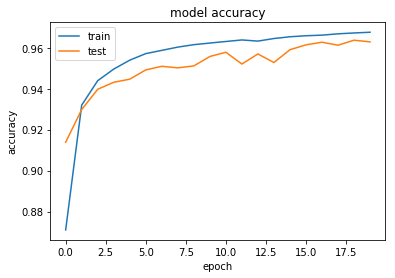

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc= 'upper left' )
plt.show()

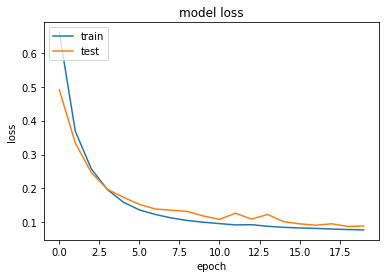

In [0]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend([ 'train' , 'test' ], loc= 'upper left' )
plt.show()

In [0]:
model1.save_weights('unet_inception_tr.h5')

In [0]:
model.predict()

In [0]:
model = load_model('unet_inception.h5')

In [0]:
from keras.models import load_model

model.save('unet_inception.h5')  # creates a HDF5 file 'my_model.h5'
#del model
#model = load_model('my_model.h5')

In [0]:
type(data_OT_new)

numpy.ndarray

In [0]:
hf=h5py.File('Training_Data.h5','r')
print(list(hf.keys()))
#data_T1_IR=hf['data_T1_IR_new'][:]
#data_T1=hf['data_T1_new'][:]
data_T2_FLAIR=hf['data_T2_FLAIR_new'][:]
#data_OT=hf['data_OT_new'][:]
hf.close()
#plt.imshow(data_T1[200])
#data_OT=data_OT.astype(int)
#X=np.unique(data_OT)

['data_OT_new', 'data_T1_new', 'data_T2_FLAIR_new']


In [0]:
train_data[500,:,:,:].shape

(240, 240, 3)

In [0]:
#model.evaluate(data_T2_FLAIR,data_OT,batch_size=4)
p=model.predict(train_data[500,:,:,:].reshape(1,240,240,3))
p_new = np.round_(p,0)

#weights = model.load_weights('weights_2F.0010.h5')


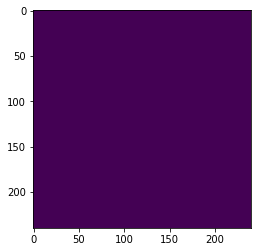

In [17]:
plt.imshow(p_new[0,:,:,1])

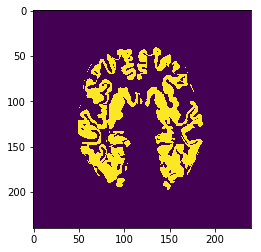

In [0]:
plt.imshow(data_OT_new[500,:,:,1])

In [0]:
p_new.shape

(1, 240, 240, 4)

In [0]:
import matplotlib
matplotlib.image.imsave('op_1(500).png', p[0,:,:,0])
matplotlib.image.imsave('op_2(500).png', p[0,:,:,1])
matplotlib.image.imsave('op_3.png(500)', p[0,:,:,2])
matplotlib.image.imsave('op_4.png(500)', p[0,:,:,3])

In [0]:
data_T2_FLAIR_new = np.reshape(data_T2_FLAIR,(4560,240,240,1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


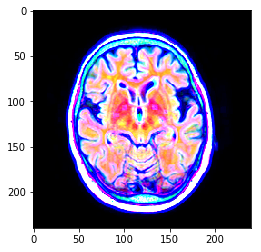

In [0]:
plt.imshow(train_data[500,:,:,:])

In [0]:
train_data[500,:,:,:].shape

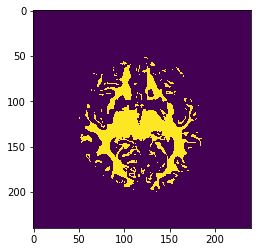

In [0]:
plt.imshow(np.round(p[0,:,:,2],0))
           

In [0]:
smooth=1
def dice_coef(y_true, y_pred):
    y_true_f = Kb.flatten(y_true)
    y_pred_f = Kb.flatten(y_pred)
    intersection = Kb.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (Kb.sum(y_true_f*y_true_f) + Kb.sum(y_pred_f*y_pred_f) + smooth)

In [0]:
d = dice_coef(data_OT_new[500,:,:,1:].astype('float32'),p[0,:,:,1:].astype('float32'))

In [0]:
print(d)

Tensor("truediv_1:0", shape=(), dtype=float32)


In [0]:
init_op = tf.initialize_all_variables()

#run the graph
with tf.Session() as sess:
    sess.run(init_op) #execute init_op
    #print the random values that we sample
    print (sess.run(d))

0.76145726


In [0]:
def group_norm(x,G,eps = 1e-5):
  N,H,W,C = x.shape
  G = min(G,C)
  x = np.reshape(x,[N,H,W,G,C//G])
  mean = np.mean(x,axis = [1,2,4],keepdims = True)
  var = np.var(x,axis = [1,2,4],keepdims = True)
  gamma = np.ones((1,1,1,C))
  beta = np.zeros((1,1,1,C))
  x = (x-mean)/np.sqrt(var+eps)
  x = np.reshape(x,[N,H,W,C])
  return x
  

In [0]:
len(model.layers)

336

In [0]:
img = train_data[500].reshape((1,240,240,3))

In [0]:
from keras import models
def activation_model(model, n_layers):
  layer_outputs = [layer.output for layer in model.layers[:n_layers]][1:]

  activation_model = models.Model(inputs = model.input, outputs = layer_outputs)
  return activation_model

In [0]:
act_model = activation_model(model, 100)

In [0]:
activations = act_model.predict(img)

In [0]:
act_model.summary()

In [0]:
np.shape(activations[10])

(1, 240, 240, 16)

In [0]:
def show_nth_activation_layers(n):
    layer_activations = activations[n-1]
    columns = 8
    for i in range(layer_activations.shape[3]):
      plt.figure
      plt.subplot(layer_activations.shape[3]/columns+1, columns, i+1)
      plt.imshow(layer_activations[0,:,:,i], cmap = 'gray')
    plt.show()

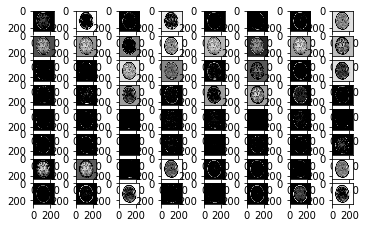

In [0]:
show_nth_activation_layers(16)

In [0]:
layer_activations = activations[50]
layer_activations.shape

(1, 120, 120, 16)

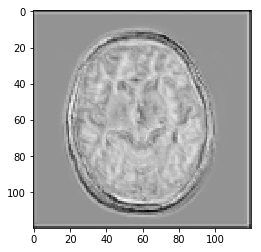

In [0]:
plt.imshow(layer_activations[0,:,:,15], cmap = 'gray')